In [17]:
import numpy as np
import xarray as xr
import scipy
import gdal
from scipy.ndimage.filters import uniform_filter
from scipy.ndimage.filters import *
import os
import math
from osgeo import osr
from fractions import Fraction

import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
%matplotlib inline

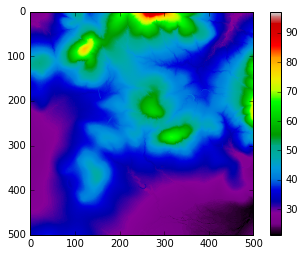

In [18]:
# Setup initial input data.
location = (r'/g/data/xc0/user/walker/sjw603/dem_5m')
os.chdir(location)
ds = gdal.Open('fit_3_dem.tif')
x = np.array(ds.GetRasterBand(1).ReadAsArray())
input_DEM = x[3000:3500, 3000:3500]

plt.imshow(input_DEM, cmap="nipy_spectral")
plt.colorbar()

In [17]:
z = np.array_split(x,5)

In [19]:
z[0]

array([[ 0.9560213 ,  0.99779973,  0.59895839,  0.24469003,  0.27872731,
         0.13523926,  0.74416388,  0.32474815,  0.19886148,  0.41496704],
       [ 0.98448232,  0.72701939,  0.88657453,  0.39932026,  0.88874222,
         0.35893345,  0.70704893,  0.39477071,  0.60609039,  0.49318656]])

In [21]:
a = np.array_split(z[0],5, axis = 1)

In [28]:
a[2].shape

(2, 2)

In [26]:
type(a)

list

In [27]:
len(a)

5

In [19]:
from fractions import Fraction

In [24]:
def x_y_size_test(input_array, resolution_ratio, resample_levels, number_of_options):
    
    """This function checks the size of the array and ensures that it can be resampled up and down 
    by a factor of three and always result in an array of the original size."""
    
    # Check number of rows and columns. 
    rows = np.size(input_array, 0)
    columns = np.size(input_array, 1)
    
    array_sizes = []
    for i in range(1,number_of_options):
        min_dim_size = resolution_ratio ** resample_levels
        ideal_array = i * min_dim_size
        array_sizes.append(ideal_array)

    ideal_row = next(x[1] for x in enumerate(array_sizes) if x[1] > rows)
    ideal_col = next(x[1] for x in enumerate(array_sizes) if x[1] > columns)
    
    add_rows = ideal_row - rows
    add_columns = ideal_col - columns
    
    empty_array = np.zeros((rows + add_rows, columns + add_columns)) # Create an empty array to the pad if required.
    
    offset_rows = int(-1 * add_rows)
    offset_columns = int(-1 * add_columns)
    
    empty_array[:offset_rows, :offset_columns] = input_array
    
    return empty_array

# Create a mask to apply to final output

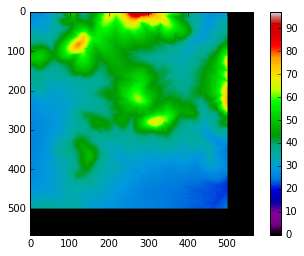

In [30]:
b = x_y_size_test(input_DEM, 3, 4, 20)

b.shape

plt.imshow(b, cmap="nipy_spectral")
plt.colorbar()

In [12]:
ratio = 3
resample_levels = 5
number_of_options = 20
min_dim_size = ratio**resample_levels
min_dim_size

array_sizes = []
for i in range(1,number_of_options):
    min_dim_size = ratio**resample_levels
    array = i * min_dim_size
    array_sizes.append(array)

array_sizes


[243,
 486,
 729,
 972,
 1215,
 1458,
 1701,
 1944,
 2187,
 2430,
 2673,
 2916,
 3159,
 3402,
 3645,
 3888,
 4131,
 4374,
 4617]

In [15]:
myNumber = 2900
next(x[1] for x in enumerate(array_sizes) if x[1] > myNumber)


2916

In [45]:
a = 81
for i in range(1, 4):
    b = 3**i
    y = a**1/b
    print (y)

27.0
9.0
3.0
